In [1]:
# General Electric - Stock market abbreviation: GE
# Import Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries
ts = TimeSeries(key='your_API_key_here',output_format='pandas')

In [2]:
# Use the Alpha Vantage API to get General Electric stock data
GE_data, metadata=ts.get_daily('GE',outputsize='full')
GE_data.describe()

,1. open,2. high,3. low,4. close,5. volume
count,5228.000000,5228.000000,5228.000000,5228.000000,5.228000e+03
mean,29.334218,29.654464,28.991366,29.325720,4.733809e+07
std,21.223920,21.541058,20.922539,21.250652,4.318775e+07
min,5.610000,5.660000,5.480000,5.490000,1.779700e+06
25%,18.340000,18.507500,18.130000,18.300000,2.181282e+07
50%,27.020000,27.200000,26.770750,27.010000,3.485579e+07
75%,34.020000,34.280000,33.800000,34.020000,5.779832e+07
max,166.130000,167.940000,161.310000,166.000000,7.529044e+08


In [3]:
# Create a csv file of the data
GE_data.to_csv('GE_data.csv')

In [4]:
# Sort by date
GE_data['date'] = GE_data.index

In [5]:
# Show our data
GE_data

,1. open,2. high,3. low,4. close,5. volume,date
date,,,,,,
2020-08-11,6.87,7.00,6.69,6.73,93141505.0,2020-08-11
2020-08-10,6.43,6.70,6.38,6.67,94345023.0,2020-08-10
2020-08-07,6.29,6.46,6.25,6.40,83064872.0,2020-08-07
2020-08-06,6.33,6.42,6.28,6.33,69915675.0,2020-08-06
2020-08-05,6.17,6.40,6.14,6.40,106612741.0,2020-08-05
...,...,...,...,...,...,...
1999-11-05,133.19,134.81,133.19,133.75,4688900.0,1999-11-05
1999-11-04,132.50,133.56,130.50,131.88,4353600.0,1999-11-04
1999-11-03,132.88,132.94,130.00,131.38,4589000.0,1999-11-03


In [6]:
# Read in our stock market data to use for training
GE_training_complete = pd.read_csv('//project_3/GE_data.csv')

In [7]:
# Filter all the data from our training set and will retain only the values for the open column
# We will use the opening stock price for our testing
GE_training_processed = GE_training_complete.iloc[:, 1:2].values

In [8]:
# Scale the data so we can use a recurrent neural network on it
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

GE_training_scaled = scaler.fit_transform(GE_training_processed)

In [9]:
# Create two lists: feature_set and labels
features_set = []
labels = []
for i in range(60, 5228):
    features_set.append(GE_training_scaled[i-60:i, 0])
    labels.append(GE_training_scaled[i, 0])

In [10]:
# Convert both the feature_set and the labels list to the numpy array before we can use it for training
features_set, labels = np.array(features_set), np.array(labels)

In [11]:
# In order to train LSTM on our data, we need to convert our data into the shape accepted by the LSTM.
# We need to convert our data into three-dimensional format
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

In [12]:
# Import dependencies
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [13]:
# Instantiate the sequential class
model = Sequential()

In [14]:
# Add LSTM layer to the model that we just created. LSTM = Long Short-Term Memory, a type of RNN
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [15]:
# Add dropout layer to avoid overfitting of the data
model.add(Dropout(0.2))

In [16]:
# Add three more LSTM and dropout layers to our model
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

In [17]:
# To make our model more robust we add a dense layer
model.add(Dense(units = 1))

In [18]:
# Compile the model and set parameters
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [19]:
# Train the model - this can take a while
model.fit(features_set, labels, epochs = 100, batch_size = 32)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 5167 samples
Epoch 1/100
5167/5167 [==============================] - 28s 5ms/sample - loss: 0.0027
Epoch 2/100
5167/5167 [==============================] - 26s 5ms/sample - loss: 0.0014
Epoch 3/100
5167/5167 [==============================] - 26s 5ms/sample - loss: 0.0012
Epoch 4/100
5167/5167 [==============================] - 26s 5ms/sample - loss: 9.6572e-04
Epoch 5/100
5167/5167 [==============================] - 26s 5ms/sample - loss: 8.7469e-04
Epoch 6/100
5167/5167 [==============================] - 26s 5ms/sample - loss: 8.6493e-04
Epoch 7/100
5167/5167 [==============================] - 25s 5ms/sample - loss: 7.4513e-04
Epoch 8/100
5167/5167 [==============================] - 25s 5ms/sample - loss: 6.3948e-04
Epoch 9/100
5167/5167 [==============================] - 26s 5ms/sample - loss: 8.1226e-04
Epoch 10/100
5167/5167 [==============================] - 25s 5ms/sample - lo

5167/5167 [==============================] - 26s 5ms/sample - loss: 2.8136e-04
Epoch 87/100
5167/5167 [==============================] - 25s 5ms/sample - loss: 2.6471e-04
Epoch 88/100
5167/5167 [==============================] - 25s 5ms/sample - loss: 2.9690e-04
Epoch 89/100
5167/5167 [==============================] - 24s 5ms/sample - loss: 2.9630e-04
Epoch 90/100
5167/5167 [==============================] - 24s 5ms/sample - loss: 3.4423e-04
Epoch 91/100
5167/5167 [==============================] - 24s 5ms/sample - loss: 2.5777e-04
Epoch 92/100
5167/5167 [==============================] - 24s 5ms/sample - loss: 3.6739e-04
Epoch 93/100
5167/5167 [==============================] - 24s 5ms/sample - loss: 2.9466e-04
Epoch 94/100
5167/5167 [==============================] - 24s 5ms/sample - loss: 2.8236e-04
Epoch 95/100
5167/5167 [==============================] - 25s 5ms/sample - loss: 2.8021e-04
Epoch 96/100
5167/5167 [==============================] - 24s 5ms/sample - loss: 2.8695e-04
E

In [20]:
# Pull in recent stock data to test the prediction model against - last 100 days of data
GE_data2, metadata=ts.get_daily('GE',outputsize='compact')
GE_data2.describe()

,1. open,2. high,3. low,4. close,5. volume
count,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,6.833899,6.984750,6.645626,6.794500,1.058729e+08
std,0.545462,0.564528,0.499384,0.536964,3.733347e+07
min,5.610000,5.660000,5.480000,5.490000,4.898478e+07
25%,6.467500,6.595000,6.322500,6.430000,7.584436e+07
50%,6.825000,6.930000,6.610000,6.790000,9.798218e+07
75%,7.092500,7.305000,6.962500,7.050000,1.251308e+08
max,8.450000,8.570000,8.110000,8.460000,2.545470e+08


In [21]:
GE_data2.to_csv('GE_data2.csv')

In [22]:
GE_data2['date'] = GE_data2.index

In [23]:
GE_data2

,1. open,2. high,3. low,4. close,5. volume,date
date,,,,,,
2020-08-11,6.87,7.00,6.69,6.73,93141505.0,2020-08-11
2020-08-10,6.43,6.70,6.38,6.67,94345023.0,2020-08-10
2020-08-07,6.29,6.46,6.25,6.40,83064872.0,2020-08-07
2020-08-06,6.33,6.42,6.28,6.33,69915675.0,2020-08-06
2020-08-05,6.17,6.40,6.14,6.40,106612741.0,2020-08-05
...,...,...,...,...,...,...
2020-03-26,7.63,8.30,7.51,8.12,123153365.0,2020-03-26
2020-03-25,7.45,8.00,6.96,7.56,137757779.0,2020-03-25
2020-03-24,6.66,7.06,6.47,7.01,119146054.0,2020-03-24


In [24]:
# Read in our testing data
GE_testing_complete = pd.read_csv('//project_3/GE_data2.csv')
GE_testing_processed = GE_testing_complete.iloc[:, 1:2].values

In [25]:
# Concatenate our training data and testing data
GE_total = pd.concat((GE_training_complete['1. open'], GE_testing_complete['1. open']), axis=0)

In [26]:
# Prepare our test inputs. The input for each day should contain the opening stock prices for the previous 60 days
# We need opening stock prices for the 20 test days and the 60 stock prices from the last 60 days for the training set
test_inputs = GE_total[len(GE_total) - len(GE_testing_complete) - 60:].values

In [27]:
# Scale the test data
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)

In [28]:
# Prepare our final test input set that will contain previous 60 stock prices
test_features = []
for i in range(60, 161):
    test_features.append(test_inputs[i-60:i, 0])

In [29]:
# Convert our data into the three-dimensional format which can be used as input to the LSTM
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

In [30]:
# Call the predict method on the model that we trained
predictions = model.predict(test_features)

In [31]:
# Since we scaled our data, the predictions made by the LSTM are also scaled 
# We need to reverse the scaled prediction back to their actual values
predictions = scaler.inverse_transform(predictions)

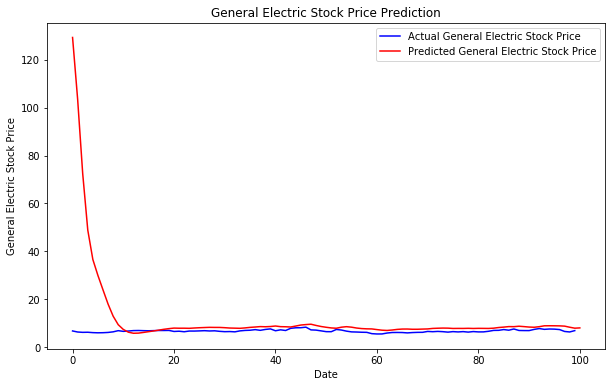

In [32]:
# Plot the results - model trained with 100 epochs 
plt.figure(figsize=(10,6))
plt.plot(GE_testing_processed, color='blue', label='Actual General Electric Stock Price')
plt.plot(predictions , color='red', label='Predicted General Electric Stock Price')
plt.title('General Electric Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('General Electric Stock Price')
plt.legend()
plt.show()

In [33]:
# Save the model - can be used later
model.save("General_Electric_model_trained.h5")